In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import numpy as nm

In [2]:
df = pd.read_csv("data.csv")
df.head()

,User ID,Gender,Ager,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
x = df.iloc[:,2:4]
y = df.iloc[:,4]


In [4]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x = scalar.fit_transform(x)
x

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [6]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier()

In [7]:
y_pred = classifier.predict(x_test)

In [8]:
from sklearn.metrics import accuracy_score
#cm = confusion_matrix(y_test, y_pred)
#accuracy = (cm.diagonal().sum())/len(y_pred)
#accuracy
accuracy_score(y_test, y_pred)

0.89

# VISUALIZATION TRAIN DATA

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


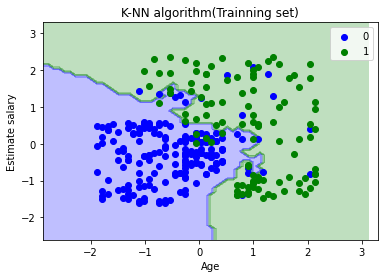

In [84]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as mtp
x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start = x_set[:,0].min()-1, stop = x_set[:,0].max()+1, step=0.1), nm.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step = 0.1))


mtp.contourf(x1, x2, classifier.predict(nm.array( [x1.ravel(), x2.ravel()] ).T ).reshape(x1.shape), alpha=0.25, cmap = ListedColormap(('blue','green')))

mtp.xlim(x1.min(), x2.max())
mtp.ylim(x2.min(), x2.max())

for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('blue','green'))(i), label=j)
mtp.xlabel("Age")
mtp.ylabel("Estimate salary")
mtp.title("K-NN algorithm(Trainning set)")
mtp.legend()
mtp.show()

VISUALIZE THE TRAIN DATA

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


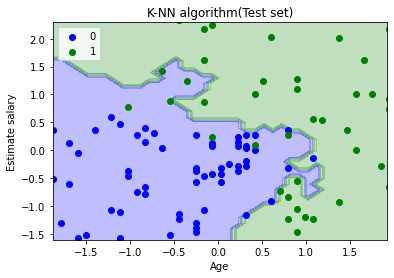

In [102]:
x1_set, x2_set = x_test, y_test

x1, x2 = nm.meshgrid(nm.arange(start = x1_set[:, 0].min(), stop = x1_set[:, 0].max(), step=0.1 ), nm.arange(start = x1_set[:,1].min(), stop= x1_set[:,1].max(), step=0.1))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), alpha=0.25, cmap = ListedColormap(('blue','green')))

mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())

for i, j in enumerate(nm.unique(x2_set)):
    mtp.scatter(x1_set[x2_set ==j, 0], x1_set[x2_set == j, 1], c=ListedColormap(('blue','green'))(i), label=j)
mtp.xlabel("Age")
mtp.ylabel("Estimate salary")
mtp.legend()
mtp.title("K-NN algorithm(Test set)")
mtp.show()